In [1]:
import zipfile
import numpy as np # linear algebra
import pandas as pd

In [2]:
#Due to limited memory of the machine (you can ignore this)
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [5]:
flights = pd.read_csv('Flights.zip',compression='zip')

In [6]:
reduce_mem_usage(flights)

Memory usage of dataframe is 1006.05 MB
Memory usage after optimization is: 298.71 MB
Decreased by 70.3%


,ItinID,MktID,MktCoupons,Year,Quarter,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCountry,...,BulkFare,Passengers,MktFare,MktDistance,MktDistanceGroup,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType,Unnamed: 41
0,20211243122,2021124312202,1,2021,1,14100,1410005,34100,PHL,US,...,0.0,3.0,64.0,2402.0,5,2402.0,2402.0,2,2,NaN
1,20211243123,2021124312301,1,2021,1,12892,1289208,32575,LAX,US,...,0.0,2.0,68.5,2402.0,5,2402.0,2402.0,2,2,NaN
2,20211243123,2021124312302,1,2021,1,14100,1410005,34100,PHL,US,...,0.0,2.0,68.5,2402.0,5,2402.0,2402.0,2,2,NaN
3,20211243124,2021124312401,1,2021,1,12892,1289208,32575,LAX,US,...,0.0,3.0,70.5,2402.0,5,2402.0,2402.0,2,2,NaN
4,20211243124,2021124312402,1,2021,1,14100,1410005,34100,PHL,US,...,0.0,3.0,70.5,2402.0,5,2402.0,2402.0,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139626,20211474348,2021147434803,2,2021,1,11603,1160302,31603,EUG,US,...,0.0,1.0,117.5,1682.0,4,1682.0,1608.0,1,1,NaN
3139627,20211474349,2021147434901,2,2021,1,10299,1029906,30299,ANC,US,...,0.0,1.0,140.0,1682.0,4,1682.0,1608.0,1,1,NaN
3139628,20211474349,2021147434903,2,2021,1,11603,1160302,31603,EUG,US,...,0.0,1.0,140.0,1682.0,4,1682.0,1608.0,1,1,NaN
3139629,20211474350,2021147435001,2,2021,1,10299,1029906,30299,ANC,US,...,0.0,1.0,152.0,1682.0,4,1682.0,1608.0,1,1,NaN


In [7]:
#flights['Dest'].value_counts()
flights.columns

Index(['ItinID', 'MktID', 'MktCoupons', 'Year', 'Quarter', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCountry',
       'OriginStateFips', 'OriginState', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCountry', 'DestStateFips', 'DestState', 'DestStateName', 'DestWac',
       'AirportGroup', 'WacGroup', 'TkCarrierChange', 'TkCarrierGroup',
       'OpCarrierChange', 'OpCarrierGroup', 'RPCarrier', 'TkCarrier',
       'OpCarrier', 'BulkFare', 'Passengers', 'MktFare', 'MktDistance',
       'MktDistanceGroup', 'MktMilesFlown', 'NonStopMiles', 'ItinGeoType',
       'MktGeoType', 'Unnamed: 41'],
      dtype='object')

In [8]:
flights['OpCarrier'].value_counts()

99    791404
WN    541327
AA    345974
DL    335447
UA    218978
OO    136672
NK    107441
B6     93089
G4     88904
AS     88077
YX     85062
F9     61122
MQ     46826
YV     36894
OH     36136
9E     34636
QX     29678
HA     23112
C5      8292
G7      7672
SY      7395
PT      7350
ZW      5431
3M      2385
--       237
4B        40
9K        13
AC         9
7H         9
9X         6
EM         5
NH         4
CM         2
LH         1
SK         1
Name: OpCarrier, dtype: int64

In [9]:
flights = flights[['Quarter', 'Origin', 'OriginWac', 'Dest', 'DestWac', 'MktDistance', 'Passengers' , 'OpCarrier' , 'MktFare' ]]
flights

,Quarter,Origin,OriginWac,Dest,DestWac,MktDistance,Passengers,OpCarrier,MktFare
0,1,PHL,23,LAX,91,2402.0,3.0,AA,64.0
1,1,LAX,91,PHL,23,2402.0,2.0,AA,68.5
2,1,PHL,23,LAX,91,2402.0,2.0,AA,68.5
3,1,LAX,91,PHL,23,2402.0,3.0,AA,70.5
4,1,PHL,23,LAX,91,2402.0,3.0,AA,70.5
...,...,...,...,...,...,...,...,...,...
3139626,1,EUG,92,ANC,1,1682.0,1.0,99,117.5
3139627,1,ANC,1,EUG,92,1682.0,1.0,99,140.0
3139628,1,EUG,92,ANC,1,1682.0,1.0,99,140.0
3139629,1,ANC,1,EUG,92,1682.0,1.0,99,152.0


In [10]:
origin = 'DFW'
dest = 'ORD'

miles_df =flights[(flights['Origin'] == origin) & (flights['Dest'] == dest)]
miles_df['MktDistance']

5718       801.0
5724       801.0
5728       801.0
10370      801.0
15847      801.0
           ...  
2989607    801.0
2989609    801.0
2989611    801.0
3040742    801.0
3110464    801.0
Name: MktDistance, Length: 1861, dtype: float16

In [11]:
flights.dtypes

Quarter            int8
Origin         category
OriginWac          int8
Dest           category
DestWac            int8
MktDistance     float16
Passengers      float16
OpCarrier      category
MktFare         float16
dtype: object

# PART 1 — Begin data analytics by evaluating data distribution.

### 1.1) Are there any null values anywhere?

In [12]:
flights.isnull().sum()

Quarter        0
Origin         0
OriginWac      0
Dest           0
DestWac        0
MktDistance    0
Passengers     0
OpCarrier      0
MktFare        0
dtype: int64

### 1.2) What's the distribution/frequency of ['NumTicketsOrdered']?

### 1.3) What's the distribution/frequency of ['AirlineCompany']?

In [13]:
flights['OpCarrier'].value_counts()

99    791404
WN    541327
AA    345974
DL    335447
UA    218978
OO    136672
NK    107441
B6     93089
G4     88904
AS     88077
YX     85062
F9     61122
MQ     46826
YV     36894
OH     36136
9E     34636
QX     29678
HA     23112
C5      8292
G7      7672
SY      7395
PT      7350
ZW      5431
3M      2385
--       237
4B        40
9K        13
AC         9
7H         9
9X         6
EM         5
NH         4
CM         2
LH         1
SK         1
Name: OpCarrier, dtype: int64

The (12) Remaining Airline Companies After Data Refinement. These 2-letter codes are from the Department of Transportation's [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?DB_ID=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29&DB_Short_Name=Origin%20and%20Destination%20Survey) --
* WN --	Southwest Airlines Co.
* DL --	Delta Air Lines Inc.
* AA --	American Airlines Inc.
* UA --	United Air Lines Inc.
* B6 --	JetBlue Airways
* AS --	Alaska Airlines Inc.
* NK --	Spirit Air Lines
* G4 --	Allegiant Air
* F9 --	Frontier Airlines Inc.
* HA --	Hawaiian Airlines Inc.
* SY --	Sun Country Airlines d/b/a MN Airlines
* VX --	Virgin America



### 1.4) What's the distribution/frequency of ['PricePerTicket']?

In [14]:
flights['MktFare'].describe()

count    3139631.00
mean            NaN
std             NaN
min            0.00
25%           97.75
50%          156.50
75%          240.00
max        28768.00
Name: MktFare, dtype: float64

### 1.5) What's the distribution/frequency of ['Miles']?

C:\Users\MELLOW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MktDistance', ylabel='Density'>

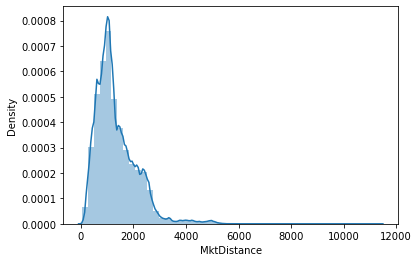

In [15]:
import seaborn as sns
y2 = flights['MktDistance']
sns.distplot(y2)

### 1.6) What's the spread of PricePerTicket vs. Miles?

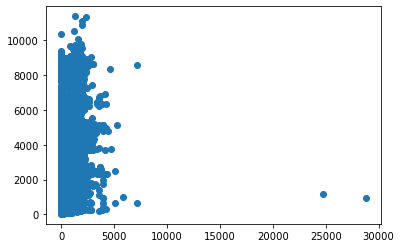

In [16]:
import matplotlib.pyplot as plt
plt.scatter(flights['MktFare'], flights['MktDistance'])

### 1.7) Set aside lists of AirlineCompany values, Dest values, and Origin values for using in user interface web app later

In [17]:
airlinecompanies = sorted(list(flights['OpCarrier'].unique()))

In [18]:
origins = sorted(list(flights['Origin'].unique()))

In [19]:
destinations = sorted(list(flights['Dest'].unique()))

In [20]:
len(origins)

426

In [21]:
flights.dtypes

Quarter            int8
Origin         category
OriginWac          int8
Dest           category
DestWac            int8
MktDistance     float16
Passengers      float16
OpCarrier      category
MktFare         float16
dtype: object

In [22]:
flights = flights.drop(columns = ['OriginWac','DestWac'])
flights

,Quarter,Origin,Dest,MktDistance,Passengers,OpCarrier,MktFare
0,1,PHL,LAX,2402.0,3.0,AA,64.0
1,1,LAX,PHL,2402.0,2.0,AA,68.5
2,1,PHL,LAX,2402.0,2.0,AA,68.5
3,1,LAX,PHL,2402.0,3.0,AA,70.5
4,1,PHL,LAX,2402.0,3.0,AA,70.5
...,...,...,...,...,...,...,...
3139626,1,EUG,ANC,1682.0,1.0,99,117.5
3139627,1,ANC,EUG,1682.0,1.0,99,140.0
3139628,1,EUG,ANC,1682.0,1.0,99,140.0
3139629,1,ANC,EUG,1682.0,1.0,99,152.0


In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flights, train_size = 0.70, test_size = 0.30, random_state=42)

train, val = train_test_split(train, train_size = 0.50, test_size = 0.50, random_state=42)

train.shape, val.shape, test.shape

((1098870, 7), (1098871, 7), (941890, 7))

In [24]:
target = ['MktFare']
features = flights.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

In [25]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)

pipeline.fit(x_train, y_train)

C:\Users\MELLOW\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Origin', 'Dest', 'OpCarrier'],
                                mapping=[{'col': 'Origin',
                                          'data_type': CategoricalDtype(categories=['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV',
                  'ACY', 'ADK',
                  ...
                  'VEL', 'VLD', 'VPS', 'VQS', 'WRG', 'XNA', 'XWA', 'YAK',
                  'YKM', 'YUM'],
, ordered=False),
                                          'mapping': FLL      1
GEG      2
ONT      3
CVG      4
LAS      5
      ... 
LNS    415
IWD    416
GLH    417
AOO    418
NaN...
                  'AS', 'B6', 'C5', 'CM', 'DL', 'EM', 'F9', 'G4', 'G7', 'HA',
                  'LH', 'MQ', 'NH', 'NK', 'OH', 'OO', 'PT', 'QX', 'SK', 'SY',
                  'UA', 'WN', 'YV', 'YX', 'ZW'],
, ordered=False),
                                          'mapping': UA      1
WN      2
99      3
AS      4
NK      5
YX      6
AA      7
D

In [26]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(x_val)
print('RandomForest R^2 Score = ', r2_score(y_val, y_pred))

RandomForest R^2 Score =  1.0


C:\Users\MELLOW\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:605: RuntimeWarning: overflow encountered in square
  denominator = (weight * (y_true - np.average(


In [27]:
# Encode the categoricals
encoder = OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.fit_transform(x_val)
x_test_encoded = encoder.fit_transform(x_test)

In [28]:
# LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model2 = LinearRegression()
model2.fit(x_train_encoded, y_train)
y_pred2 = model2.predict(x_val_encoded)
print('LinearRegression R² Score = ', r2_score(y_val, y_pred2))

LinearRegression R² Score =  1.0


C:\Users\MELLOW\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:605: RuntimeWarning: overflow encountered in square
  denominator = (weight * (y_true - np.average(


In [29]:
#RidgeRegression Model
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(x_train_encoded, y_train)
y_pred3 = model3.predict(x_val_encoded)
print('RidgeRegression R² Score = ', r2_score(y_val, y_pred3))

RidgeRegression R² Score =  1.0


C:\Users\MELLOW\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:605: RuntimeWarning: overflow encountered in square
  denominator = (weight * (y_true - np.average(


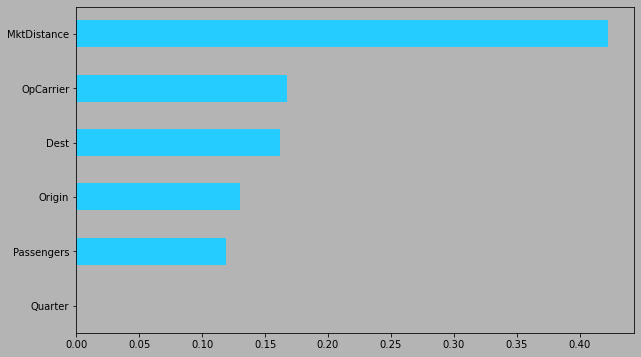

In [30]:
# Get feature importances
model = pipeline.named_steps['randomforestregressor']
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6), facecolor = '#b4b4b4')
ax.set(facecolor='#b4b4b4')
#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff');

In [31]:
from pdpbox.pdp import pdp_isolate, pdp_plot

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='MktDistance'>})

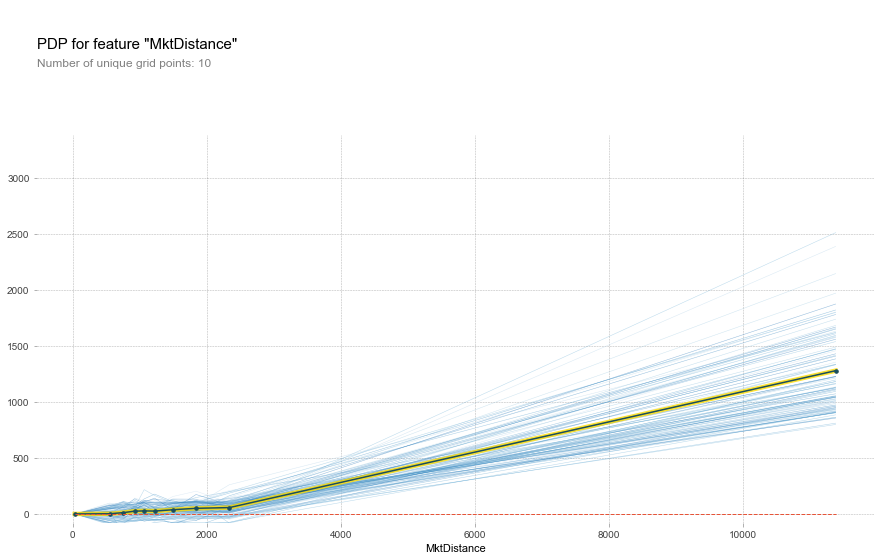

In [32]:
feature4 = 'MktDistance'

isolated4 = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    feature=feature4
)

pdp_plot(isolated4, feature_name=feature4, plot_lines=True, frac_to_plot=100)

In [33]:
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=9)

['pipeline.joblib']

In [34]:
pipeline_encoder = pipeline.named_steps['ordinalencoder']
mapping = pipeline_encoder.mapping

origin_dict = dict(mapping[0])
dest_dict = mapping[1]
airline_dict = mapping[2]

In [35]:
origin_dict['mapping'].index[0]

'FLL'

In [36]:
pd.Series.to_json(origin_dict['mapping'])

'{"FLL":1,"GEG":2,"ONT":3,"CVG":4,"LAS":5,"MCI":6,"STT":7,"EWR":8,"ADQ":9,"DAL":10,"CLE":11,"SJU":12,"MSY":13,"LGA":14,"IAD":15,"RSW":16,"AUS":17,"ABQ":18,"ORD":19,"LIT":20,"IND":21,"PBG":22,"DEN":23,"MIA":24,"PHX":25,"MSO":26,"PBI":27,"MDW":28,"MCO":29,"SEA":30,"SAN":31,"TPA":32,"JAC":33,"DCA":34,"STL":35,"HDN":36,"PVD":37,"CLT":38,"SAT":39,"ABE":40,"TRI":41,"ATL":42,"SBA":43,"SRQ":44,"GRB":45,"BZN":46,"IAH":47,"RAP":48,"SFO":49,"TUS":50,"LEX":51,"BQK":52,"LCH":53,"BOS":54,"SNA":55,"PIT":56,"MLU":57,"DFW":58,"PDX":59,"DTW":60,"EGE":61,"EYW":62,"TXK":63,"BWI":64,"MSP":65,"ORF":66,"SLC":67,"BDL":68,"AVP":69,"OKC":70,"HNL":71,"LAX":72,"BNA":73,"MLI":74,"PGD":75,"PHL":76,"JFK":77,"GTF":78,"SMF":79,"PNS":80,"MKE":81,"HOU":82,"MYR":83,"TUL":84,"DAY":85,"MDT":86,"LCK":87,"RDM":88,"OGG":89,"PSP":90,"FAT":91,"BUR":92,"KOA":93,"IDA":94,"RST":95,"GPT":96,"BTV":97,"ELP":98,"RDU":99,"GSP":100,"CHS":101,"MSN":102,"SPS":103,"SGU":104,"GFK":105,"ICT":106,"BHM":107,"ROC":108,"SJT":109,"JAX":110,"OAK":

In [37]:
{'label': 'Southwest Airline Co. (WN)', 'value': 2},

({'label': 'Southwest Airline Co. (WN)', 'value': 2},)

In [38]:
origin_string_dict = ''
for row in origin_dict['mapping']:
    origin_string_dict += ("{")
    origin_string_dict += (f"'label': '{origin_dict['mapping'].index[row]}', 'value': {origin_dict['mapping'][row]}")
    origin_string_dict += ("}, ")

In [39]:
origin_string_dict

"{'label': 'GEG', 'value': 2}, {'label': 'ONT', 'value': 3}, {'label': 'CVG', 'value': 4}, {'label': 'LAS', 'value': 5}, {'label': 'MCI', 'value': 6}, {'label': 'STT', 'value': 7}, {'label': 'EWR', 'value': 8}, {'label': 'ADQ', 'value': 9}, {'label': 'DAL', 'value': 10}, {'label': 'CLE', 'value': 11}, {'label': 'SJU', 'value': 12}, {'label': 'MSY', 'value': 13}, {'label': 'LGA', 'value': 14}, {'label': 'IAD', 'value': 15}, {'label': 'RSW', 'value': 16}, {'label': 'AUS', 'value': 17}, {'label': 'ABQ', 'value': 18}, {'label': 'ORD', 'value': 19}, {'label': 'LIT', 'value': 20}, {'label': 'IND', 'value': 21}, {'label': 'PBG', 'value': 22}, {'label': 'DEN', 'value': 23}, {'label': 'MIA', 'value': 24}, {'label': 'PHX', 'value': 25}, {'label': 'MSO', 'value': 26}, {'label': 'PBI', 'value': 27}, {'label': 'MDW', 'value': 28}, {'label': 'MCO', 'value': 29}, {'label': 'SEA', 'value': 30}, {'label': 'SAN', 'value': 31}, {'label': 'TPA', 'value': 32}, {'label': 'JAC', 'value': 33}, {'label': 'DCA'

In [40]:
origin_string2_dict = '{'
for row in origin_dict['mapping']:
    origin_string2_dict += (f"{origin_dict['mapping'][row]}: '{origin_dict['mapping'].index[row]}', ")

In [41]:
origin_string2_dict

"{2: 'GEG', 3: 'ONT', 4: 'CVG', 5: 'LAS', 6: 'MCI', 7: 'STT', 8: 'EWR', 9: 'ADQ', 10: 'DAL', 11: 'CLE', 12: 'SJU', 13: 'MSY', 14: 'LGA', 15: 'IAD', 16: 'RSW', 17: 'AUS', 18: 'ABQ', 19: 'ORD', 20: 'LIT', 21: 'IND', 22: 'PBG', 23: 'DEN', 24: 'MIA', 25: 'PHX', 26: 'MSO', 27: 'PBI', 28: 'MDW', 29: 'MCO', 30: 'SEA', 31: 'SAN', 32: 'TPA', 33: 'JAC', 34: 'DCA', 35: 'STL', 36: 'HDN', 37: 'PVD', 38: 'CLT', 39: 'SAT', 40: 'ABE', 41: 'TRI', 42: 'ATL', 43: 'SBA', 44: 'SRQ', 45: 'GRB', 46: 'BZN', 47: 'IAH', 48: 'RAP', 49: 'SFO', 50: 'TUS', 51: 'LEX', 52: 'BQK', 53: 'LCH', 54: 'BOS', 55: 'SNA', 56: 'PIT', 57: 'MLU', 58: 'DFW', 59: 'PDX', 60: 'DTW', 61: 'EGE', 62: 'EYW', 63: 'TXK', 64: 'BWI', 65: 'MSP', 66: 'ORF', 67: 'SLC', 68: 'BDL', 69: 'AVP', 70: 'OKC', 71: 'HNL', 72: 'LAX', 73: 'BNA', 74: 'MLI', 75: 'PGD', 76: 'PHL', 77: 'JFK', 78: 'GTF', 79: 'SMF', 80: 'PNS', 81: 'MKE', 82: 'HOU', 83: 'MYR', 84: 'TUL', 85: 'DAY', 86: 'MDT', 87: 'LCK', 88: 'RDM', 89: 'OGG', 90: 'PSP', 91: 'FAT', 92: 'BUR', 93: '

In [42]:
dest_string_dict = ''
for row in dest_dict['mapping']:
    dest_string_dict += ("{")
    dest_string_dict += (f"'label': '{dest_dict['mapping'].index[row]}', 'value': {dest_dict['mapping'][row]}")
    dest_string_dict += ("}, ")

In [43]:
dest_string_dict

"{'label': 'PHX', 'value': 2}, {'label': 'ATL', 'value': 3}, {'label': 'EYW', 'value': 4}, {'label': 'JAX', 'value': 5}, {'label': 'PDX', 'value': 6}, {'label': 'AUS', 'value': 7}, {'label': 'CLE', 'value': 8}, {'label': 'ANC', 'value': 9}, {'label': 'HNL', 'value': 10}, {'label': 'LAS', 'value': 11}, {'label': 'BWI', 'value': 12}, {'label': 'EWR', 'value': 13}, {'label': 'MIA', 'value': 14}, {'label': 'IAH', 'value': 15}, {'label': 'CVG', 'value': 16}, {'label': 'MSP', 'value': 17}, {'label': 'SFO', 'value': 18}, {'label': 'KOA', 'value': 19}, {'label': 'MKE', 'value': 20}, {'label': 'SFB', 'value': 21}, {'label': 'LGA', 'value': 22}, {'label': 'BNA', 'value': 23}, {'label': 'MTJ', 'value': 24}, {'label': 'BOS', 'value': 25}, {'label': 'BUF', 'value': 26}, {'label': 'SHR', 'value': 27}, {'label': 'JFK', 'value': 28}, {'label': 'LAX', 'value': 29}, {'label': 'MCO', 'value': 30}, {'label': 'MDT', 'value': 31}, {'label': 'IND', 'value': 32}, {'label': 'SJU', 'value': 33}, {'label': 'SAN'

In [44]:
dest_string2_dict = '{'
for row in dest_dict['mapping']:
    dest_string2_dict += (f"{dest_dict['mapping'][row]}: '{dest_dict['mapping'].index[row]}', ")

In [45]:
dest_dict = {2: 'ISP', 3: 'SEA', 4: 'CLT', 5: 'JAX', 6: 'TPA', 7: 'MCO', 8: 'MDW', 9: 'DTW', 10: 'MSY', 11: 'LAX', 12: 'DEN', 13: 'MCI', 14: 'BQN', 15: 'LGA', 16: 'BWI', 17: 'PSM', 18: 'AZA', 19: 'PHX', 20: 'DFW', 21: 'EWR', 22: 'ONT', 23: 'MKE', 24: 'SAT', 25: 'BOS', 26: 'ELM', 27: 'JFK', 28: 'LIH', 29: 'PBI', 30: 'MSP', 31: 'LAS', 32: 'DAL', 33: 'RIC', 34: 'ANC', 35: 'OAK', 36: 'CVG', 37: 'SAN', 38: 'CHS', 39: 'ELP', 40: 'MIA', 41: 'LGB', 42: 'HNL', 43: 'FLL', 44: 'IAD', 45: 'PVD', 46: 'OGG', 47: 'CHA', 48: 'SLC', 49: 'BUR', 50: 'PWM', 51: 'ATL', 52: 'PDX', 53: 'FAT', 54: 'SFO', 55: 'SMF', 56: 'AUS', 57: 'RSW', 58: 'STL', 59: 'CLE', 60: 'MEM', 61: 'PHL', 62: 'SJC', 63: 'HOU', 64: 'PNS', 65: 'SAV', 66: 'DCA', 67: 'IAH', 68: 'SNA', 69: 'SJU', 70: 'TUL', 71: 'BNA', 72: 'CMH', 73: 'SDF', 74: 'PSP', 75: 'MAF', 76: 'RNO', 77: 'TUS', 78: 'GFK', 79: 'ALB', 80: 'KOA', 81: 'ABQ', 82: 'BGR', 83: 'GTF', 84: 'RDU', 85: 'FSD', 86: 'BOI', 87: 'GRR', 88: 'OMA', 89: 'PIT', 90: 'SIT', 91: 'HPN', 92: 'IND', 93: 'BUF', 94: 'PGD', 95: 'PIE', 96: 'GEG', 97: 'BRW', 98: 'BDL', 99: 'SGF', 100: 'SFB', 101: 'PBG', 102: 'DSM', 103: 'STX', 104: 'ITO', 105: 'MLI', 106: 'ATW', 107: 'JAC', 108: 'MYR', 109: 'COS', 110: 'LCK', 111: 'CAK', 112: 'JAN', 113: 'BIL', 114: 'BHM', 115: 'ORF', 116: 'SRQ', 117: 'FWA', 118: 'OME', 119: 'PVU', 120: 'VPS', 121: 'MHT', 122: 'PIA', 123: 'MLB', 124: 'MTJ', 125: 'HRL', 126: 'MDT', 127: 'SYR', 128: 'OKC', 129: 'ROC', 130: 'STT', 131: 'SCK', 132: 'EUG', 133: 'CID', 134: 'BLI', 135: 'EYW', 136: 'SWF', 137: 'ORH', 138: 'AMA', 139: 'GSO', 140: 'AVL', 141: 'RFD', 142: 'LIT', 143: 'SBN', 144: 'ILM', 145: 'EGE', 146: 'FNT', 147: 'HDN', 148: 'CDV', 149: 'SPI', 150: 'SBA', 151: 'BIS', 152: 'AVP', 153: 'RAP', 154: 'ECP', 155: 'ABE', 156: 'LBB', 157: 'ACK', 158: 'TTN', 159: 'JNU', 160: 'HYA', 161: 'ICT', 162: 'GPT', 163: 'ACY', 164: 'ROA', 165: 'PSE', 166: 'BZN', 167: 'CRP', 168: 'DAY', 169: 'TYS', 170: 'CAE', 171: 'SHV', 172: 'IAG', 173: 'MSN', 174: 'BTR', 175: 'DAB', 176: 'MFE', 177: 'ADQ', 178: 'FAI', 179: 'TLH', 180: 'USA', 181: 'GJT', 182: 'GUC', 183: 'BLV', 184: 'MSO', 185: 'GUM', 186: 'BTV', 187: 'FAR', 188: 'KTN', 189: 'TOL', 190: 'BET', 191: 'EVV', 192: 'HTS', 193: 'GSP', 194: 'CKB', 195: 'STC', 196: 'IDA', 197: 'LBE', 198: 'LEX', 199: 'GRI', 200: 'GST', 201: 'OGS', 202: 'PSC', 203: 'MFR', 204: 'BMI', 205: 'OGD', 206: 'AGS', 207: 'FCA', 208: 'XNA', 209: 'LFT', 210: 'SPN', 211: 'MOT', 212: 'HGR', 213: 'TVC', 214: 'AKN', 215: 'PSG', 216: 'SMX', 217: 'MOB', 218: 'STS', 219: 'LRD', 220: 'MVY', 221: 'OTZ', 222: 'HSV', 223: 'MRY', 224: 'PHF', 225: 'BKG', 226: 'WRG', 227: 'SCC', 228: 'CHO', 229: 'OWB', 230: 'TRI', 231: 'YAK', 232: 'PPG', 233: 'DLH', 234: 'GNV', 235: 'FAY', 236: 'CRW', 237: 'YNG', 238: 'GRB', 239: 'DLG', 240: 'ADK', 241: 'LNK', 242: 'ASE', 243: 'DRO', 244: 'MKG', 245: 'SGU', 246: 'BFL', 247: 'OTH', 248: 'CPR', 249: 'ITH', 250: 'SBP', 251: 'SCE', 252: 'RST', -2: 'nan', 252: 'RST'}

In [46]:
dest_string2_dict[2]

':'

In [47]:
for x in dest_dict:
  print(dest_dict[x])

ISP
SEA
CLT
JAX
TPA
MCO
MDW
DTW
MSY
LAX
DEN
MCI
BQN
LGA
BWI
PSM
AZA
PHX
DFW
EWR
ONT
MKE
SAT
BOS
ELM
JFK
LIH
PBI
MSP
LAS
DAL
RIC
ANC
OAK
CVG
SAN
CHS
ELP
MIA
LGB
HNL
FLL
IAD
PVD
OGG
CHA
SLC
BUR
PWM
ATL
PDX
FAT
SFO
SMF
AUS
RSW
STL
CLE
MEM
PHL
SJC
HOU
PNS
SAV
DCA
IAH
SNA
SJU
TUL
BNA
CMH
SDF
PSP
MAF
RNO
TUS
GFK
ALB
KOA
ABQ
BGR
GTF
RDU
FSD
BOI
GRR
OMA
PIT
SIT
HPN
IND
BUF
PGD
PIE
GEG
BRW
BDL
SGF
SFB
PBG
DSM
STX
ITO
MLI
ATW
JAC
MYR
COS
LCK
CAK
JAN
BIL
BHM
ORF
SRQ
FWA
OME
PVU
VPS
MHT
PIA
MLB
MTJ
HRL
MDT
SYR
OKC
ROC
STT
SCK
EUG
CID
BLI
EYW
SWF
ORH
AMA
GSO
AVL
RFD
LIT
SBN
ILM
EGE
FNT
HDN
CDV
SPI
SBA
BIS
AVP
RAP
ECP
ABE
LBB
ACK
TTN
JNU
HYA
ICT
GPT
ACY
ROA
PSE
BZN
CRP
DAY
TYS
CAE
SHV
IAG
MSN
BTR
DAB
MFE
ADQ
FAI
TLH
USA
GJT
GUC
BLV
MSO
GUM
BTV
FAR
KTN
TOL
BET
EVV
HTS
GSP
CKB
STC
IDA
LBE
LEX
GRI
GST
OGS
PSC
MFR
BMI
OGD
AGS
FCA
XNA
LFT
SPN
MOT
HGR
TVC
AKN
PSG
SMX
MOB
STS
LRD
MVY
OTZ
HSV
MRY
PHF
BKG
WRG
SCC
CHO
OWB
TRI
YAK
PPG
DLH
GNV
FAY
CRW
YNG
GRB
DLG
ADK
LNK
ASE
DRO
MKG
SGU
BFL
OTH
CPR
ITH
SBP
SCE


In [48]:
airline_dict

{'col': 'OpCarrier',
 'mapping': UA      1
 WN      2
 99      3
 AS      4
 NK      5
 YX      6
 AA      7
 DL      8
 F9      9
 G4     10
 B6     11
 OO     12
 QX     13
 OH     14
 SY     15
 9E     16
 MQ     17
 YV     18
 HA     19
 C5     20
 G7     21
 3M     22
 PT     23
 ZW     24
 --     25
 SK     26
 AC     27
 4B     28
 CM     29
 7H     30
 9K     31
 LH     32
 9X     33
 NH     34
 NaN    -2
 dtype: int64,
 'data_type': CategoricalDtype(categories=['--', '3M', '4B', '7H', '99', '9E', '9K', '9X', 'AA', 'AC',
                   'AS', 'B6', 'C5', 'CM', 'DL', 'EM', 'F9', 'G4', 'G7', 'HA',
                   'LH', 'MQ', 'NH', 'NK', 'OH', 'OO', 'PT', 'QX', 'SK', 'SY',
                   'UA', 'WN', 'YV', 'YX', 'ZW'],
 , ordered=False)}

In [49]:
origin_options = flights['Origin'].unique()
miles_string = '{'

for origin in origin_options:
    origin_data = flights[flights['Origin'] == origin]
    unique_dest = origin_data['Dest'].unique()
    for dest in unique_dest:
        dest_data = origin_data[origin_data['Dest'] == dest].reset_index()
        miles_string += f"'{origin}>{dest}':{int(dest_data['MktDistance'][0])},"
miles_string = miles_string[0:-2]
miles_string += '}'

In [50]:
miles_string

"{'PHL>LAX':2402,'PHL>SAN':2400,'PHL>PHX':2076,'PHL>ONT':2400,'PHL>RAP':2138,'PHL>RNO':2676,'PHL>SAT':1516,'PHL>SDF':586,'PHL>CLL':1399,'PHL>SRQ':984,'PHL>TUL':1540,'PHL>TUS':2116,'PHL>ATL':666,'PHL>CLE':363,'PHL>FLL':992,'PHL>MIA':1013,'PHL>CID':874,'PHL>DSM':977,'PHL>FAR':1235,'PHL>FNT':901,'PHL>FSD':1141,'PHL>GRB':852,'PHL>IND':855,'PHL>LNK':1144,'PHL>MEM':1169,'PHL>MSN':787,'PHL>OKC':2052,'PHL>OMA':1094,'PHL>ORD':678,'PHL>ASE':1691,'PHL>ATW':839,'PHL>AUS':1655,'PHL>BZN':1864,'PHL>CMX':1038,'PHL>CWA':891,'PHL>DLH':1075,'PHL>GRR':815,'PHL>HNL':4920,'PHL>IAH':1603,'PHL>ICT':1266,'PHL>MCI':1081,'PHL>MKE':745,'PHL>OGG':4864,'PHL>SFO':2524,'PHL>SLC':1928,'PHL>SPI':852,'PHL>ABQ':2382,'PHL>ABI':1461,'PHL>ACT':1392,'PHL>AEX':1588,'PHL>AMA':1615,'PHL>LEX':520,'PHL>BMI':1993,'PHL>BOI':2810,'PHL>BPT':1573,'PHL>CLT':449,'PHL>CMH':796,'PHL>COS':1895,'PHL>COU':1792,'PHL>SMF':2610,'PHL>SUN':2116,'PHL>YUM':2324,'PHL>AGS':589,'PHL>CVG':507,'PHL>ALB':212,'PHL>BGR':473,'PHL>PVD':237,'PHL>ART':287,'PHL

In [51]:
# saving the model 
import pickle 
pickle_out = open("regressor.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [52]:
def predict(ItinID, MktID, MktCoupons, Quarter, Origin, OriginWac, Dest, DestWac, Miles, ContiguousUSA, NumTicketsOrdered, AirlineCompany):

  #ContiguousUSA = boolean dictionary

  #Miles = dictionary

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[ItinID, MktID, MktCoupons, Quarter, Origin, OriginWac, Dest, DestWac, MktDistance, Passengers, OpCarrier]], 
        columns=['ItinID', 'MktID', 'MktCoupons', 'Quarter', 'Origin', 'OriginWac', 'Dest', 'DestWac','MktDistance', 'Passengers', 'OpCarrier']
    )
    
    pred = model.predict(df)[0]